# **Lab 9 Clustering**


# **This lab is 2% of total Lab weight**

---
# Clustering

Clustering is a technique that falls under the umbrella of unsupervised machine learning algorithms. Unsupervised machine learning algorithms are used when we need to find patterns in the data without the help of a target variable/label.
This means that we don't have a target variable $y$ but only the feature variables $X$. Since we don't have the target variable to *supervise* the model training, they are known as unsupervised problems.

Imagine you were asked to group different food dishes without any criterion. One way you might go about solving such a problem is by tasting each dish and separating spicy and non-spicy dishes. As you can see, without a criterion, you were able to learn a pattern among the dishes that helped you group them into the two categories. In other words, you found patterns in the data in an unsupervised way.

There are many clustering algorithms such as K-Means, Agglomerative Clustering, DBSCan etc.
We are going to focus on K-means.

NOTE: K-means is different from KNN, which is a supervised learning algorithm.

## K-Means algorithm.

At a very high level, the k-means algorithm partitions $n$ points into $k$ clusters, where each observation belongs to a cluster with the nearest cluster centroid.

Here are the detailed steps of the algorithm.



1.   Choose the number of clusters $k$.
2.   Select $k$ random points from the data as centroids.
3.   Assign all the points to the closest cluster centroid.
4.   Recalculate the cluster centroids of the new clusters.
5.   Repeat steps 3 and 4

Since K-means is an iterative algorithm, we need to have some stopping criteria for the algorithm to finish executing.
The following stopping criteria can be used:


1.   Stop when the cluster centroids do not change.
2.   New points remain in the same cluster.
3.   Maximum number of iterations is reached.

Mathematically, the algorithm minimizes the within cluster sum of squares. [This](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a) article provides a mathematical explanation for the algorithm.

Refer to this [link](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#h2_9) for some visual companion of the algorithm.



## K-Means Example


Let's understand how the algorithm works using a simple example. Fortunately, we do not have to implement the algorithm from scratch as scikit-learn provides us with an easy interface to use K-Means.


In [1]:
# Import python packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

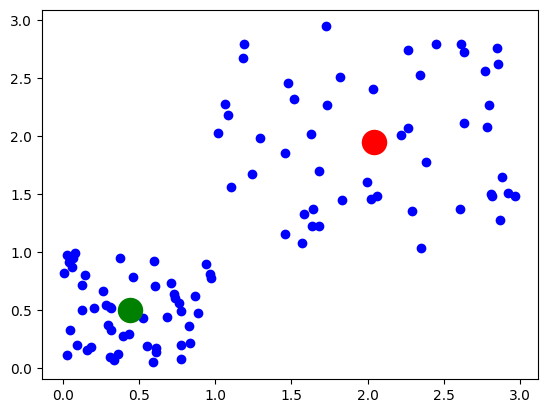

In [2]:
# We will create some data points using numpy.
np.random.seed(42)
x1 = 1 * np.random.rand(50, 2)
x2 = 1 + 2 * np.random.rand(50, 2)

plt.scatter(x1[:,0], x1[:, 1], color='blue')
plt.scatter(x2[:,0], x2[:, 1], color='blue')
plt.scatter(np.mean(x1[:,0]), np.mean(x1[:,1]), s=300, color='green')
plt.scatter(np.mean(x2[:,0]), np.mean(x2[:,1]), s=300, color='red')
plt.show()

You might be able to figure out from the visual that there may be two groups of points here.

**How it works:** The k-means algorithm will try to find $k$ centroids of the clusters and then allocates each point to a cluster with the centroid $k_i$ in a way that reduces the intra-cluster sum of squares. In other words, the algorithm will select the clusters in a way that the sum of squares of all the distances from the centroid will be smaller.

As you might imagine, the algorithm requires a predefined number of clusters to be selected. In the example image above, the green and red markers are the centroids for the two groups. It was easy in this case because we were able to visualize the data and figure out the groups. But what if we have a more complex dataset?

In that case, we need to use the K-means algorithm to find out the clusters and assign new points to the respective clusters.

## Scikit-Learn K-means

Scikit-Learn provides us with the K-Means model to solve unsupervised machine learning problems. Since we already know that our data has two clusters, we will tell that to the K-means algorithm.

Before training the model on the dataset, let's reformat our dataset to be in line with how ML problems are structured.

In [3]:
X = np.vstack([x1, x2])
print(X.shape)  # Check the shape

(100, 2)


This mimics the situation where we only have the input features $X$ but not the target variable $y$.

In [4]:
model = KMeans(n_clusters=2, random_state=0)

# And then we can train the model.
model.fit(X)


KMeans(n_clusters=2, random_state=0)

Now that the model has been trained on the sample dataset, we can check what are the cluster centers. We can retrieve the centroids using the following attribute of the trained model.

In [5]:
model.cluster_centers_

array([[0.44071678, 0.49964471],
       [2.04274221, 1.94858469]])

Let's plot the centroids on the graph along with the data points.

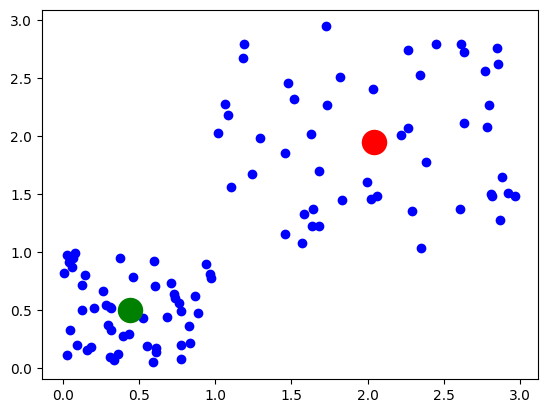

In [6]:
plt.scatter(X[:,0],X[:,1], color='blue')
plt.scatter(model.cluster_centers_[0][0],model.cluster_centers_[0][1], color='green', s=300)
plt.scatter(model.cluster_centers_[1][0],model.cluster_centers_[1][1], color='red', s=300)
plt.show()

Let's also double check that in fact the K-means algorithm gives us the cluster center values which we calculated earlier.

In [7]:
print("Center coordinates from x1 are {0} and {1}".format(np.mean(x1[:,0]), np.mean(x1[:, 1])))
print("Center coordinates from x2 are {0} and {1}".format(np.mean(x2[:,0]), np.mean(x2[:, 1])))
print("\nCenter coordinates from K-means are \n",model.cluster_centers_)

Center coordinates from x1 are 0.44071677759659983 and 0.49964470915981885
Center coordinates from x2 are 2.0427422076094333 and 1.948584685010659

Center coordinates from K-means are 
 [[0.44071678 0.49964471]
 [2.04274221 1.94858469]]


As you can see, they are the same!

## How do you choose the number of clusters?
This is an important question when using clustering algorithms.
When in doubt, use the **elbow method**. It will be clear in a moment why it's named that way.

We will use the **intertia** of the trained model. Inertia is the sum of squared distances of samples to their closest cluster center.

For each number of predefined clusters, we can train a model and check the inertia. Let's train a model on the sample dataset above.


In [8]:
# Let's say we did not know the optimal number of clusters and we want to find it in the range of 1-10.
test_clusters = np.arange(1,11)
inertias = []
for k in test_clusters:
    # Building and fitting the model
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

Now let's plot the inertias for each predefined cluster.

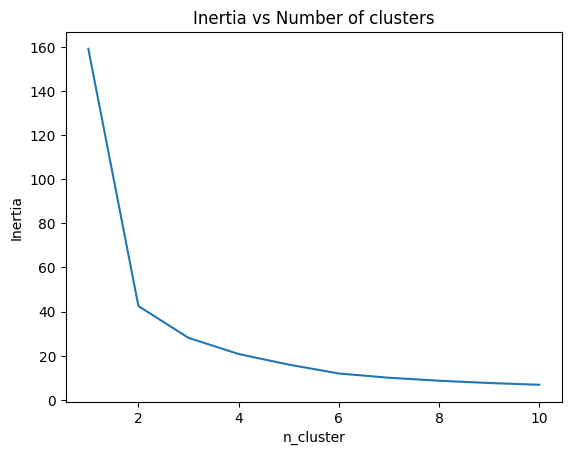

In [9]:
plt.plot(test_clusters, inertias)
plt.title("Inertia vs Number of clusters")
plt.ylabel("Inertia")
plt.xlabel("n_cluster")
plt.show()

The plot looks like an elbow! From the elbow graph, we can find out the optimal number of clusters. For the given dataset, the optimal number of custers is the value on the x-axis after which the curve starts decreasing in a linear fashion. Therefore, the optimal number of clusters is 2.

**NOTE**: One cannot claim **optimality** in choosing the number of clusters. This is because you might acheive similar performance for more than one value of n_clusters. However, for practical purposes, the elbow graph is a good method for choosing the number of clusters.

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

## Activity 1 - Train K-Means on the iris dataset [5 marks].

Train K-Means on iris data.
First, load the iris dataset from sklearn and divide the dataset into train and test subsets. For simplicity, we will only use two features, sepal width, and petal width (these are the second and fourth columns).

In [11]:
# Load the iris dataset. Print out the feature names to check you're selecting the right features (sepal length, petal length).
# Then choose the correct columns and store the data into a variable X
# and load the target into the variable y.

### ADD YOUR CODE HERE

# Load the iris dataset
iris = load_iris()

# Print the names of the features (columns) to verify feature indices
print("Feature names:", iris.feature_names)

# Select only the 2nd (index 1) and 4th (index 3) features: sepal width and petal width
X = iris.data[:, [1, 3]]

# Load the target labels (actual classes of the flowers)
y = iris.target

# Print shapes and names
print("Shape of X:", X.shape)
print("Columns of X:", iris.feature_names)
print("Shape of y:", y.shape)
print("Columns of y:", iris.target_names)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KMeans model with 3 clusters (since we know there are 3 species in iris)
kmeans = KMeans(n_clusters=3, random_state=42)

# Train the KMeans model using the training data
kmeans.fit(X_train)

### END OF YOUR CODE HERE

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of X: (150, 2)
Columns of X: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of y: (150,)
Columns of y: ['setosa' 'versicolor' 'virginica']


KMeans(n_clusters=3, random_state=42)

#Activity 2- Visualize the features [5 marks].

Since we have only two features, supply the first and second columns to the scatter function.

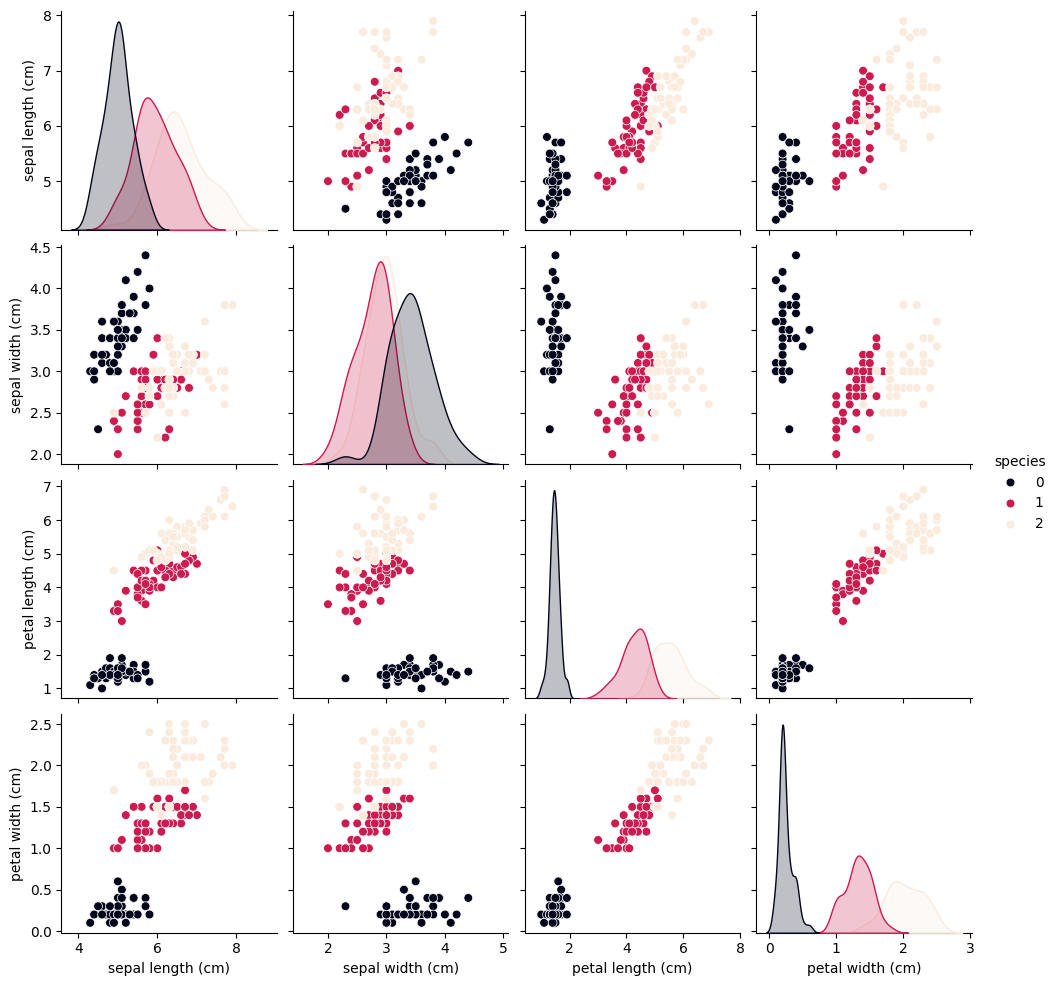

In [12]:
### ADD YOUR CODE HERE
# Create a DataFrame from the Iris dataset for better visualization

iris_df_int = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df_int["species"] = iris.target

sns.pairplot(iris_df_int, hue="species", diag_kind="kde", palette="rocket", plot_kws={"s": 40}, diag_kws={"fill": True})
plt.show()

### END OF YOUR CODE HERE

#Activity 3- Divide the dataset into two parts for validation [10 marks].

Fix the random_state=42 for reproducibily of results. You can use train_test_split but we are not actually splitting the data like supervised learning. In k-means clustering, the concept of splitting data typically refers to dividing the data into different parts for certain tasks, such as testing the stability of the clustering or validating the performance. However, k-means itself does not inherently require splitting data into different parts as supervised learning methods do, because it is an unsupervised learning algorithm.

In [13]:
### ADD YOUR CODE HERE
# We will use y_test to confirm the predict of the clusters from the trained K-Means model.
# Split the dataset into two sets (80% train, 20% test): Not same as supervised. Do not use X_Train, X_Test......
# Note: This is not a supervised learning split. We’re doing this just to test clustering stability.
X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
    X, y, test_size=0.2, random_state=42  # Ensure reproducibility with fixed random_state
)

# Print the shape of the sets.

print("X_train_part shape:", X_train_part.shape)  # Shape of training input data
print("y_train_part shape:", y_train_part.shape)  # Shape of training labels
print("X_test_part shape:", X_test_part.shape)    # Shape of test input data
print("y_test_part shape:", y_test_part.shape)    # Shape of test labels

### END OF YOUR CODE HERE

X_train_part shape: (120, 2)
y_train_part shape: (120,)
X_test_part shape: (30, 2)
y_test_part shape: (30,)


## Activity 4 - Choose the number of clusters before training the model [20 marks].
Find out the optimal number of clusters using the elbow graph and then retrain the model on a training set and the evaluate the model on the test set. Check for clusters in a range of 1 to 10 and plot the elbow graph.


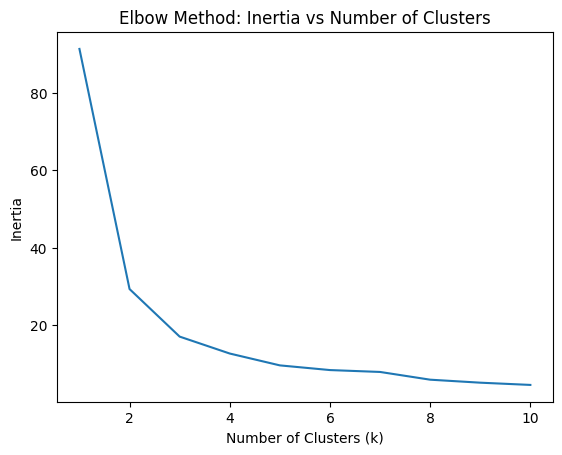

In [14]:
### ADD YOUR CODE HERE
# Define the range of cluster numbers to try
cluster_range = range(1, 11)  # Trying cluster counts from 1 to 10

# Initialize an empty list to store inertia values
inertias = []

# Fit K-Means for each cluster count and record the inertia (within-cluster sum of squares)
# Loop over the cluster range
for k in cluster_range:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model on the training part of the dataset
    kmeans.fit(X_train_part)

    # Store the inertia (sum of squared distances to nearest cluster center)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph to visualize the optimal number of clusters
plt.plot(cluster_range, inertias)  # Line plot with dots at each point
plt.title('Elbow Method: Inertia vs Number of Clusters')  # Title of the plot
plt.xlabel('Number of Clusters (k)')  # Label for x-axis
plt.ylabel('Inertia')  # Label for y-axis
plt.show()  # Display the plot

### END OF YOUR CODE HERE

# Activity 5 Plot the inertia for the trained model with each value of n_clusters [10 marks].

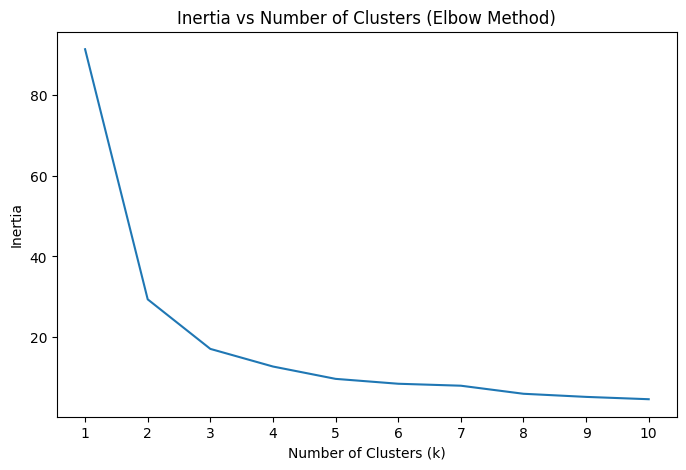

In [15]:
### ADD YOUR CODE HERE
# Plot the intertias for each predefined cluster.
plt.figure(figsize=(8, 5))  # Set the size of the plot

# Plot the inertia to visualize for each number of clusters
plt.plot(cluster_range, inertias, linestyle='-')  # Line plot with circular markers
plt.title('Inertia vs Number of Clusters (Elbow Method)')  # Title of the plot
plt.xlabel('Number of Clusters (k)')  # Label for x-axis
plt.ylabel('Inertia')  # Label for y-axis (within-cluster sum of squares)
plt.xticks(cluster_range)  # Set x-ticks to show every cluster number
plt.show()  # Display the plot

### END OF YOUR CODE HERE

#Activity 6- Retrain the model with the chosen number of clusters [10 marks].

In [16]:
### ADD YOUR CODE HERE
# Import necessary library
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn

# Load the Iris dataset
iris = load_iris()  # Load the dataset again just in case

# Choose the optimal number of clusters (assume 3 based on previous analysis)
optimal_k = 3

# Use the same two features: sepal width and petal width
X = iris.data[:, [1, 3]]  # Select columns by index (1 and 3)

# Retrain the K-Means model with the chosen number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)  # Create KMeans instance
kmeans_model.fit(X)  # Train the model on the full dataset

# Print a confirmation message
print("K-Means model has been retrained with", optimal_k, "clusters.")

### END OF YOUR CODE HERE

K-Means model has been retrained with 3 clusters.


#Activity 7 - Visualize the test data and the cluster centroids [5 marks].
Visualize the data points in the test set with the cluster centroids.

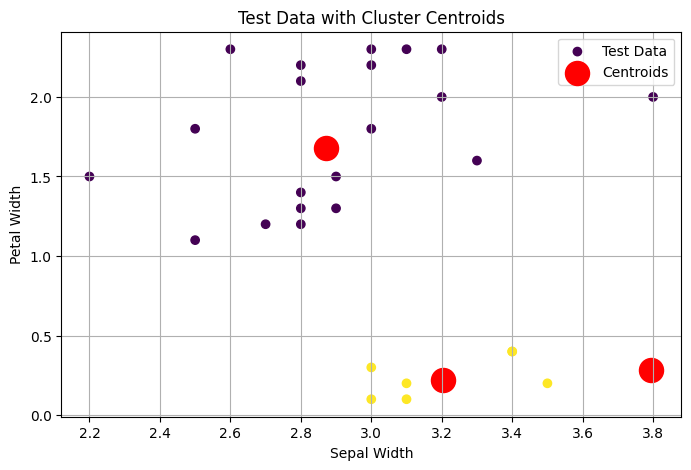

In [17]:
### ADD YOUR CODE HERE

# Assuming 'set2' has 5 features and the KMeans model was trained on the first 4 features
# For this example, we will use the existing test set (X_test_part) with 2 features: sepal width and petal width

# Predict the clusters for the test data using the selected features
predicted_clusters = kmeans_model.predict(X_test_part)  # Use the trained model to assign clusters

# Get the cluster centroids
centroids = kmeans_model.cluster_centers_  # Coordinates of the cluster centers

# Visualize the test data points and the cluster centroids
plt.figure(figsize=(8, 5))  # Set the size of the plot
plt.scatter(X_test_part[:, 0], X_test_part[:, 1], c=predicted_clusters, cmap='viridis', label='Test Data')  # Plot test data, colored by predicted cluster
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')  # Plot centroids in red with X markers
plt.title('Test Data with Cluster Centroids')  # Plot title
plt.xlabel('Sepal Width')  # X-axis label
plt.ylabel('Petal Width')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot

### END OF YOUR CODE HERE


#Activity 8- Print out the cluster centers from the trained model [3 marks].

In [18]:
### ADD YOUR CODE HERE
# Print out the cluster centers (centroids)

print("Cluster centers (centroids):")
print(kmeans_model.cluster_centers_)  # Display the coordinates of the centroids

### END OF YOUR CODE HERE

Cluster centers (centroids):
[[2.872      1.676     ]
 [3.79473684 0.28421053]
 [3.20322581 0.22258065]]


#Activity 9- Now plot the points in the ground truth value [7 marks].

You might see that some points are misclassified. Can you find what those points are?

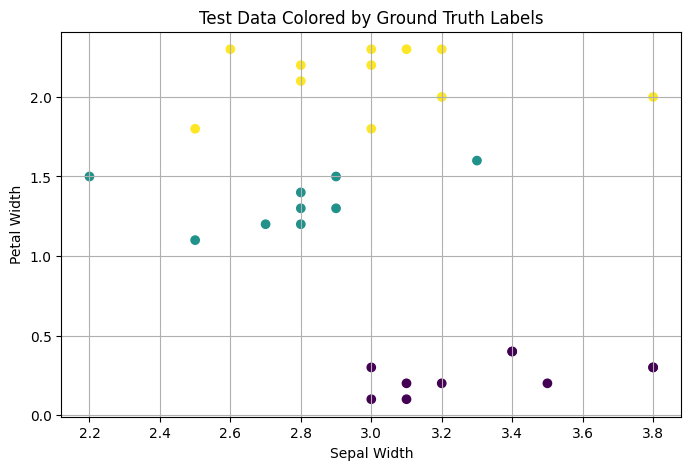

In [19]:
### ADD YOUR CODE HERE

# Visualize the test data points with the ground truth (actual labels)
plt.figure(figsize=(8, 5))  # Set the figure size

# Use actual test labels (y_test_part) to color the points
plt.scatter(X_test_part[:, 0], X_test_part[:, 1], c=y_test_part, cmap='viridis', label='Ground Truth')

# Add title and axis labels
plt.title('Test Data Colored by Ground Truth Labels')  # Title of the plot
plt.xlabel('Sepal Width')  # Label for x-axis
plt.ylabel('Petal Width')  # Label for y-axis
plt.grid(True)  # Add grid for clarity
plt.show()  # Display the plot

### END OF YOUR CODE HERE

And that's it! You now understand how the K-Means algorithm works and how to apply it to solve machine learning problems!

In [20]:
from sklearn.metrics import silhouette_score

# Use test data for prediction
X_test_for_prediction = X_test_part  # already has the right features

# Predict clusters on test data
labels = kmeans_model.predict(X_test_for_prediction)

# Evaluate clustering performance using silhouette score
score = silhouette_score(X_test_for_prediction, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5450076331611494


# **The silhouette score**

It is a metric used to evaluate the quality of clustering in unsupervised learning. It measures how well samples are clustered by considering two factors:

* Cohesion: How close each sample is to other points in the same cluster.
* Separation: How far each sample is from points in the nearest cluster.
The silhouette score ranges from -1 to 1:

* 1: Perfect clustering. Points are well matched to their cluster and far from other clusters.
* 0: Neutral clustering. Points are on or very near the boundary between clusters.
* -1: Poor clustering. Points are closer to other clusters than to their assigned cluster.


**How Is Silhouette Score Calculated?**
For each point
𝑖


𝑎
(
𝑖
)
: The average distance of
𝑖
to all other points in its cluster (intra-cluster distance).

𝑏
(
𝑖
): The average distance of
𝑖
to all points in the nearest neighboring cluster (inter-cluster distance).


The silhouette score for each point is:

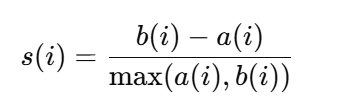

The overall silhouette score is the average
𝑠
(
𝑖
) across all points.


**Try Different Clustering Algorithms:**

If k-means doesn't work well, consider alternatives like DBSCAN, Agglomerative Clustering, or Gaussian Mixture Models.
Visualize Clusters:

Use dimensionality reduction techniques (e.g., PCA, t-SNE) to check if clusters are meaningful in lower dimensions.
Feature Engineering:

Create more meaningful features that better represent the data.

# **Activity 10: Try any other Clustering method mentioned above and use PCA for the same dataset and explain the results [30 marks].**

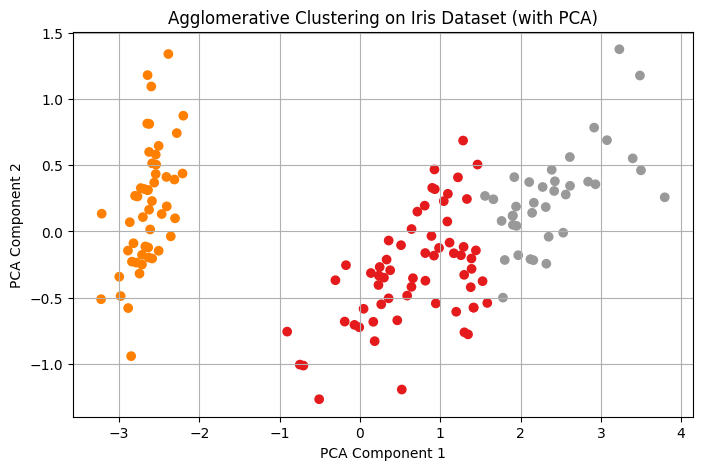

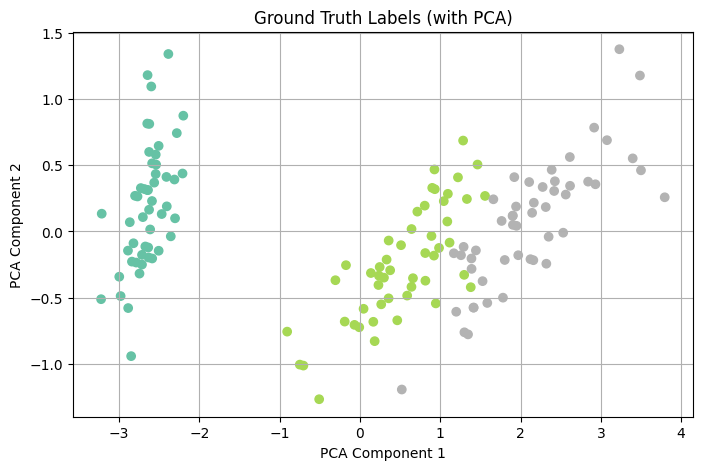

Silhouette Score for Agglomerative Clustering: 0.60


In [21]:
#Write your code here. For explanation, use 'text area'

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Use all 4 features
y = iris.target  # Ground truth labels

# Step 1: Reduce the dataset to 2 principal components using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Transform the original features into 2D PCA space

# Step 2: Apply Agglomerative Clustering (with 3 clusters)
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_pca)  # Predict cluster labels

# Step 3: Plot the PCA-reduced data colored by predicted cluster labels
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='Set1', label='Clusters')
plt.title("Agglomerative Clustering on Iris Dataset (with PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Step 4: Plot the true labels for comparison
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set2', label='Ground Truth')
plt.title("Ground Truth Labels (with PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Step 5: Evaluate the clustering using Silhouette Score
sil_score = silhouette_score(X_pca, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering: {sil_score:.2f}")

Explanation:

In this task, we applied Agglomerative Clustering on the Iris dataset and used Principal Component Analysis (PCA) to reduce the feature space from four dimensions to two. PCA helped us visualize the data by projecting it onto the two most significant axes of variation. After clustering with Agglomerative Clustering into three groups (since the Iris dataset contains three species), we plotted the predicted clusters and compared them with the actual labels. The visualization showed that the algorithm was effective at identifying the Setosa class, which is well-separated from the other two. However, there was noticeable overlap between Versicolor and Virginica, which is a known challenge due to the similarity of their features. We also computed the silhouette score, a metric that evaluates the consistency within clusters, and obtained a moderately good score, indicating that the clusters formed are reasonably well-defined. Overall, using PCA with Agglomerative Clustering allowed us to reduce complexity, visualize the data clearly, and analyze the clustering performance more effectively.





